In [1]:
# only adjust settings in this cell
state = 'NE'
root_name = 'Douglas'  # which county will root our district (or county_cluster==multi-district)?
k = 3                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 3 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 653834
Single district upper population limit U = 653835


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Douglas County to be the root. In our graph, this is vertex # 76


In [6]:
from cluster import enumerate_top_districts
first_districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 745 rows, 880 columns and 3738 nonzeros
Model fingerprint: 0xa8538c0f
Variable types: 463 continuous, 417 integer (417 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 125 rows and 138 columns
Presolve time: 0.01s
Presolved: 620 rows, 742 columns, 2925 nonzeros
Variable types: 423 continuous, 319 integer (319 binary)

Root relaxation: objective 5.471193e+00, 313 iterations, 0.01 seconds (0.01 work units)

In no particular order, the top 10 clusters are:


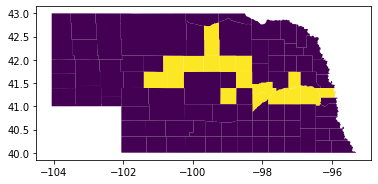

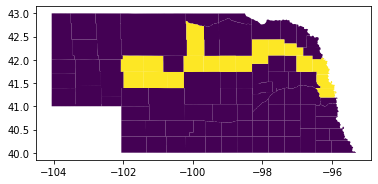

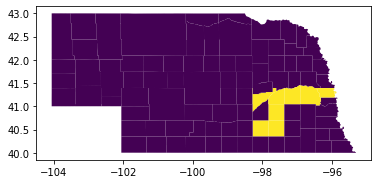

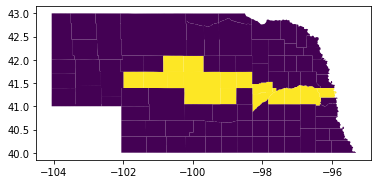

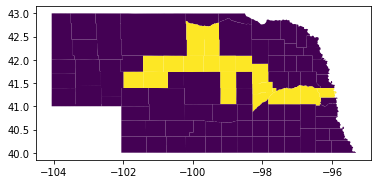

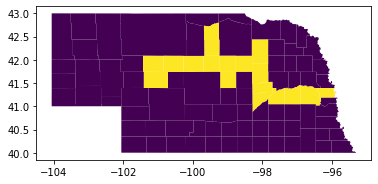

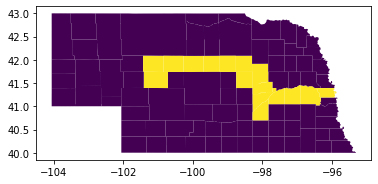

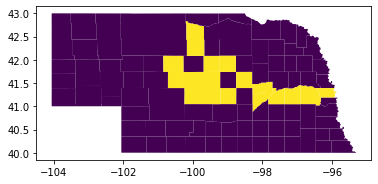

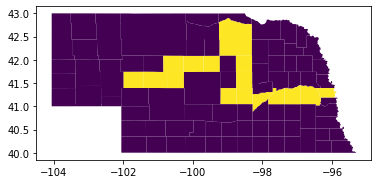

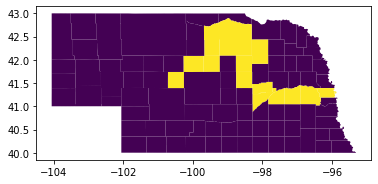

In [7]:
# Draw the first districts
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top",len(first_districts),"clusters are:")
for first_district in first_districts:
    draw_single_district( filepath, filename, G, first_district, zoom=False )

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 603 rows, 624 columns and 2752 nonzeros
Model fingerprint: 0xf53d87d7
Variable types: 315 continuous, 309 integer (309 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 226 rows and 107 columns
Presolve time: 0.01s
Presolved: 377 rows, 517 columns, 1844 nonzeros
Variable types: 307 continuous, 210 integer (210 binary)

Root relaxation: objective 2.934961e+00, 147 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

 139497 63663   67.00000   48    5          -   19.36943      -  17.3   70s
 151515 69210   28.00000   32    5          -   19.59247      -  17.2   75s
 161105 74017   27.72688   24   17          -   19.77339      -  17.1   80s
 170750 78946   22.99024   37    8          -   19.93632      -  17.0   85s
 180823 83958   20.51812   29   10          -   20.01351      -  16.9   90s
 189697 88448   32.31798   33   22          -   20.11749      -  16.9   95s
 202228 94466   28.33044   39    6          -   20.24254      -  16.8  100s
 213146 99362   40.79012   32   41          -   20.34262      -  16.7  105s
 223026 104511   43.19336   35   16          -   20.45815      -  16.6  110s
 232452 108938   22.50869   37    6          -   20.57216      -  16.6  115s
 241924 113104   24.48326   21   34          -   20.71461      -  16.5  120s
 251640 117995   30.20266   26   39          -   20.84822      -  16.5  125s
 261752 122625   34.48399   46   31          -   21.00000      -  16.4  130s
 272747

 1085238 409677   32.10484   43   13          -   26.00000      -  15.5  575s
found [0, 5, 6, 12, 15, 17, 21, 23, 24, 25, 28, 29, 32, 33, 34, 35, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 73, 79, 80, 84, 85, 87, 90, 91] with objective = 30.0
   replaced worse solution with objective = 35.0
adding cut saying that objective should be less than 30.0
 1094411 411337   29.17078   23   49          -   26.01159      -  15.6  580s
 1103217 411070   26.66362   32   40          -   26.06929      -  15.6  585s
 1113632 410858   28.77363   25   21          -   26.15458      -  15.6  590s
 1128492 410014 infeasible   25               -   26.27862      -  15.6  595s
 1143769 409051 infeasible   32               -   26.41152      -  15.6  600s
 1156372 408410 infeasible   23               -   26.52084      -  15.6  605s
 1171069 407639   29.38714   35   10          -   26.65268      -  15.6  610s
 1183129 406885 infeasible   28               -   26.76544 

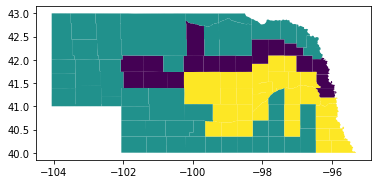

In [8]:
# code to find just one plan
from cluster import draw_plan
found = False

for first_district in first_districts:
    
    if found:
        break
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 2
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=1 )
    
    for second_district in second_districts:

        third_district = [ i for i in G.nodes if i not in first_district+second_district ]
        plan = [ first_district, second_district, third_district ]
        draw_plan( filepath, filename, G, plan )
        found = True
    

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 603 rows, 624 columns and 2752 nonzeros
Model fingerprint: 0xf53d87d7
Variable types: 315 continuous, 309 integer (309 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 226 rows and 107 columns
Presolve time: 0.01s
Presolved: 377 rows, 517 columns, 1844 nonzeros
Variable types: 307 continuous, 210 integer (210 binary)

Root relaxation: objective 2.934961e+00, 147 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

 312639 145368   46.65605   50    4          -   21.41363      -  16.3   85s
 325584 151086   57.23566   34   42          -   21.51685      -  16.2   90s
 336754 156334   46.51223   48    5          -   21.61443      -  16.2   95s
 350605 162536   34.00000   43    3          -   21.74645      -  16.2  100s
 360492 167017   56.30756   40   29          -   21.86777      -  16.1  105s
 373086 172454   24.00000   30    6          -   21.99088      -  16.1  110s
 383733 177883   33.42784   36    5          -   22.00000      -  16.1  115s
 394611 182604   28.04959   33    8          -   22.08181      -  16.0  120s
 404348 187005   27.69070   37   17          -   22.14401      -  16.0  125s
 413649 191465   26.24648   37   13          -   22.20398      -  16.0  130s
 425682 196772   26.19565   35   41          -   22.27039      -  15.9  135s
 437928 202172   28.53058   33   13          -   22.35086      -  15.9  140s
 448476 206936   24.93115   36   22          -   22.42214      -  15.9  145s

Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 2723044, time in user-callback 9.43 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 700 rows, 756 columns and 3306 nonzeros
Model fingerprint: 0x05dd94fb
Variable types: 391 continuous, 365 integer (365 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 575 rows and 475 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8

 46598 15427 infeasible   37               -   19.20332      -  13.3   20s
 58342 16492   32.48877   32   20          -   21.86767      -  12.8   25s
 76906 16118   38.57140   44    6          -   26.00764      -  12.2   30s
 97125 14888   37.83765   28   25          -   31.01504      -  11.5   35s
 110555 15705   34.18875   32   10          -   33.00598      -  11.1   40s
 136152 14471   49.16887   34   24          -   36.37483      -  10.6   45s
 165656   511 infeasible   34               -   46.08459      -   9.8   50s

Cutting planes:
  Gomory: 10
  Cover: 7
  MIR: 1
  Flow cover: 6
  Zero half: 1
  Mod-K: 2
  Lazy constraints: 103

Explored 167362 nodes (1630966 simplex iterations) in 50.30 seconds (9.81 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 337879, time in user-callback 1.24 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set 

     0     0    4.08578    0   78          -    4.08578      -     -    0s
     0     0    4.08578    0   78          -    4.08578      -     -    0s
     0     2    4.19625    0   78          -    4.19625      -     -    0s
  7169  2536 infeasible   26               -    8.63286      -  18.3    5s
 23076  7941   30.32327   29    6          -   13.07063      -  15.0   10s
 39503 12042   24.46309   30    4          -   16.52603      -  13.3   15s
 53730 15332 infeasible   34               -   18.88391      -  12.4   20s
 67047 17307 infeasible   31               -   20.83545      -  11.8   25s
 80742 17820 infeasible   38               -   23.15607      -  11.4   30s
 102644 17076 infeasible   30               -   26.48800      -  10.8   35s

Cutting planes:
  Gomory: 4
  Cover: 8
  Flow cover: 17
  Inf proof: 1
  Zero half: 6
  Mod-K: 6
  Lazy constraints: 89

Explored 133219 nodes (1264332 simplex iterations) in 39.90 seconds (7.38 work units)
Thread count was 8 (of 8 available proces

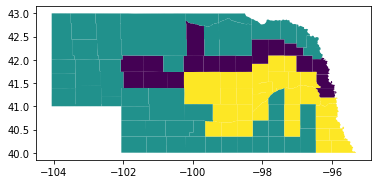

In [9]:
# code to find possibly many plans
for first_district in first_districts:
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 2
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=10 )
    
    for second_district in second_districts:

        third_district = [ i for i in G.nodes if i not in first_district+second_district ]
        plan = [ first_district, second_district, third_district ]
        draw_plan( filepath, filename, G, plan )